In [1]:
import sys
import numpy as np
import pandas as pd

## Load DMS and store object

In [2]:
sys.path.append('../')

from data_prep import dm_saver, data_manager

dms = dm_saver.DM_Saver.load('../dms')

dml = data_manager.Data_Manager()

dml.dms2dm(dms)

## Locating 'y-holes'
Dataset B and C has 'holes' in y_train. Therefore we don't want to train on this data and can remove the corresponding rows for both X and Y

In [3]:
y_hole_length = 200

1
Y HOLES B


<Axes: xlabel='date_forecast', ylabel='pv_measurement'>

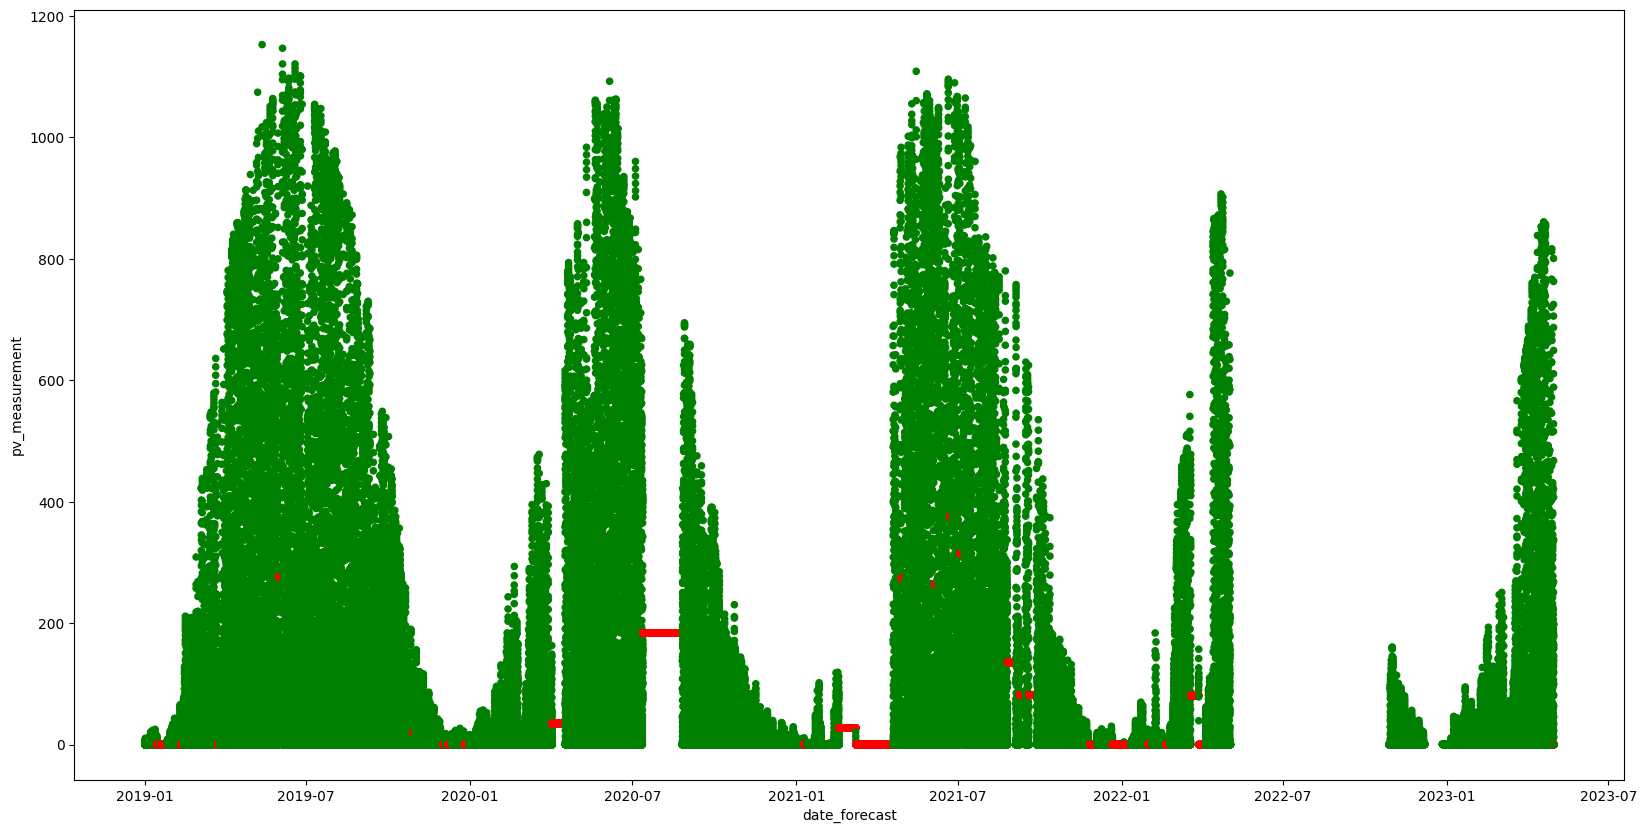

In [4]:
from helpers import find_const_interval
y_train_b_const_idx = find_const_interval(dml.train_b, 'pv_measurement', y_hole_length)

tb = dml.train_b

tb['color'] = tb.index.map(lambda x: 'red' if x in y_train_b_const_idx else 'green')

print("Y HOLES B")
tb.plot(x='date_forecast', y='pv_measurement', kind='scatter', c=tb['color'], figsize=(20, 10))


1
Y HOLES C


<Axes: xlabel='date_forecast', ylabel='pv_measurement'>

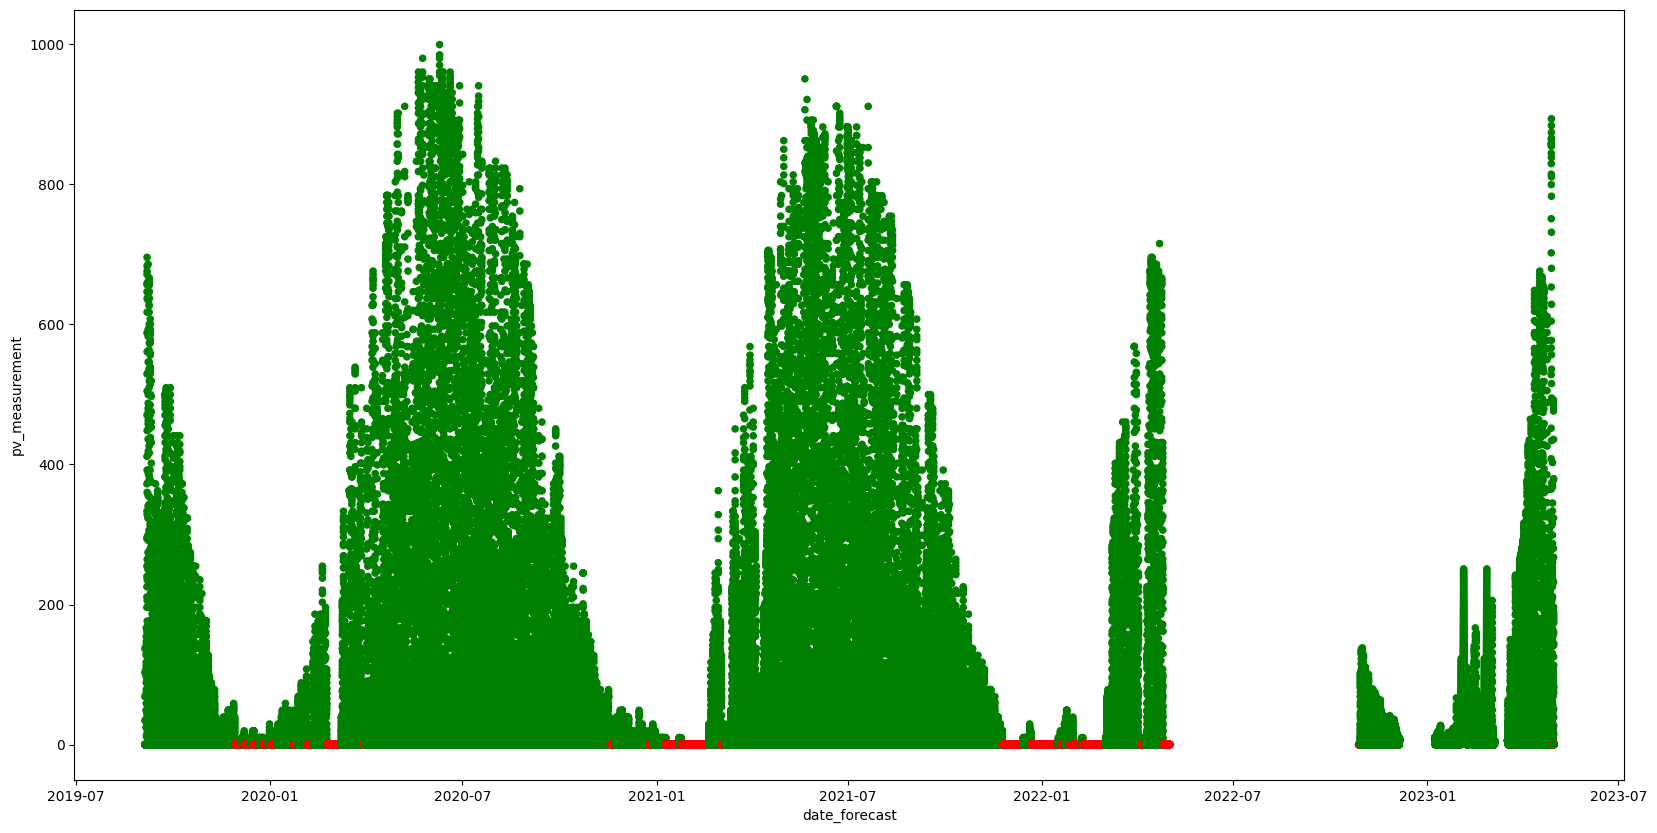

In [5]:
y_train_c_const_idx = find_const_interval(dml.train_c, 'pv_measurement', y_hole_length)

tc = dml.train_c

tc['color'] = tc.index.map(lambda x: 'red' if x in y_train_c_const_idx else 'green')

print('Y HOLES C')
tc.plot(x='date_forecast', y='pv_measurement', kind='scatter', c=tc['color'], figsize=(20, 10))


## Normalizing the train data and saving the amplitude

In [18]:
pv_a = dml.train_a['pv_measurement']
pv_b = dml.train_b['pv_measurement']
pv_c = dml.train_c['pv_measurement']

print('A:\n',pv_a.describe())
print('B:\n',pv_b.describe())
print('C:\n',pv_c.describe())

A:
 count    136517.000000
mean        629.777115
std        1150.977480
min           0.000000
25%           0.000000
50%          12.980000
75%         694.760000
max        5733.420000
Name: pv_measurement, dtype: float64
B:
 count    132097.000000
mean         96.317876
std         191.725332
min           0.000000
25%           0.000000
50%           0.000000
75%          96.600000
max        1152.300000
Name: pv_measurement, dtype: float64
C:
 count    105661.000000
mean         77.010242
std         163.431271
min           0.000000
25%           0.000000
50%           0.000000
75%          61.250000
max         999.600000
Name: pv_measurement, dtype: float64


### Mean value

In [19]:
dml.amplitude = np.array([pv_a.mean(), pv_b.mean(),pv_c.mean()])
dml.amplitude

array([629.77711465,  96.31787607,  77.01024219])

In [4]:
%store dml

Stored 'dml' (Data_Manager)
